# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from config import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Import the datetime module from the datetime library.
from datetime import datetime

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 617


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key +"&q=" + city + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vadso
Processing Record 2 of Set 1 | blackmans bay
Processing Record 3 of Set 1 | susuman
Processing Record 4 of Set 1 | sishilichengzi
City not found. Skipping...
Processing Record 5 of Set 1 | aqaba
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | ribeira grande
Processing Record 8 of Set 1 | peniche
Processing Record 9 of Set 1 | la'ie
Processing Record 10 of Set 1 | murzuq
Processing Record 11 of Set 1 | rio grande
Processing Record 12 of Set 1 | tazovsky
Processing Record 13 of Set 1 | tura
Processing Record 14 of Set 1 | patterson
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | chicxulub puerto
City not found. Skipping...
Processing Record 17 of Set 1 | college
Processing Record 18 of Set 1 | hithadhoo
Processing Record 19 of Set 1 | gereida
Processing Record 20 of Set 1 | daru
Processing Record 21 of Set 1 | bethel
Processing Recor

Processing Record 39 of Set 4 | vilyuysk
Processing Record 40 of Set 4 | dauphin
Processing Record 41 of Set 4 | geraldton
Processing Record 42 of Set 4 | cargados carajos
City not found. Skipping...
Processing Record 43 of Set 4 | selfoss
Processing Record 44 of Set 4 | lyskovo
Processing Record 45 of Set 4 | bonthe
Processing Record 46 of Set 4 | ancud
Processing Record 47 of Set 4 | egilsstadir
Processing Record 48 of Set 4 | olyokminsk
Processing Record 49 of Set 4 | lebu
Processing Record 0 of Set 5 | primorsko-akhtarsk
Processing Record 1 of Set 5 | christchurch
Processing Record 2 of Set 5 | galappo
Processing Record 3 of Set 5 | klyuchi
Processing Record 4 of Set 5 | acapulco de juarez
Processing Record 5 of Set 5 | katabu
Processing Record 6 of Set 5 | brisas de zicatela
Processing Record 7 of Set 5 | sao joao da barra
Processing Record 8 of Set 5 | betio village
Processing Record 9 of Set 5 | shenjiamen
Processing Record 10 of Set 5 | mayen abun
City not found. Skipping...
Pr

Processing Record 31 of Set 8 | as sulayyil
Processing Record 32 of Set 8 | minas de marcona
Processing Record 33 of Set 8 | ranipur
Processing Record 34 of Set 8 | salalah
Processing Record 35 of Set 8 | pitiquito
Processing Record 36 of Set 8 | springs
Processing Record 37 of Set 8 | buala
Processing Record 38 of Set 8 | almeirim
Processing Record 39 of Set 8 | marsa alam
Processing Record 40 of Set 8 | santa terezinha
Processing Record 41 of Set 8 | gaiman
Processing Record 42 of Set 8 | turpan
Processing Record 43 of Set 8 | port saint john's
Processing Record 44 of Set 8 | mesquite
Processing Record 45 of Set 8 | araguaina
Processing Record 46 of Set 8 | kone
Processing Record 47 of Set 8 | al mutayrifi
Processing Record 48 of Set 8 | sao vicente
Processing Record 49 of Set 8 | dunedin
Processing Record 0 of Set 9 | tinajo
Processing Record 1 of Set 9 | yeppoon
Processing Record 2 of Set 9 | kristiansund
Processing Record 3 of Set 9 | golhisar
Processing Record 4 of Set 9 | changl

Processing Record 21 of Set 12 | rye
Processing Record 22 of Set 12 | coaticook
Processing Record 23 of Set 12 | salekhard
Processing Record 24 of Set 12 | kulia village
City not found. Skipping...
Processing Record 25 of Set 12 | ixtapa
Processing Record 26 of Set 12 | waddan
Processing Record 27 of Set 12 | zunyi
Processing Record 28 of Set 12 | tamiahua
Processing Record 29 of Set 12 | rangkasbitung
Processing Record 30 of Set 12 | chiang khong
Processing Record 31 of Set 12 | goure
Processing Record 32 of Set 12 | grand rapids
Processing Record 33 of Set 12 | san antonio
Processing Record 34 of Set 12 | ciudad madero
Processing Record 35 of Set 12 | fauske
Processing Record 36 of Set 12 | ca mau
Processing Record 37 of Set 12 | punta del este
Processing Record 38 of Set 12 | altar
Processing Record 39 of Set 12 | taoudenni
Processing Record 40 of Set 12 | topchikha
Processing Record 41 of Set 12 | palikir - national government center
Processing Record 42 of Set 12 | divicani
Proces

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          594
Lat           594
Lng           594
Max Temp      594
Humidity      594
Cloudiness    594
Wind Speed    594
Country       594
Date          594
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vadso,70.0744,29.7487,1.09,80,40,6.69,NO,2023-11-01 09:44:20
1,blackmans bay,-43.0167,147.3167,13.07,66,1,0.45,AU,2023-11-01 09:44:20
2,susuman,62.7833,148.1667,-19.38,99,79,1.09,RU,2023-11-01 09:44:20
3,aqaba,29.5267,35.0078,30.92,33,0,4.12,JO,2023-11-01 09:40:19
4,port-aux-francais,-49.3500,70.2167,4.02,93,100,7.52,TF,2023-11-01 09:44:21


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vadso,70.0744,29.7487,1.09,80,40,6.69,NO,2023-11-01 09:44:20
1,blackmans bay,-43.0167,147.3167,13.07,66,1,0.45,AU,2023-11-01 09:44:20
2,susuman,62.7833,148.1667,-19.38,99,79,1.09,RU,2023-11-01 09:44:20
3,aqaba,29.5267,35.0078,30.92,33,0,4.12,JO,2023-11-01 09:40:19
4,port-aux-francais,-49.3500,70.2167,4.02,93,100,7.52,TF,2023-11-01 09:44:21


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [8]:
# Get data to plot 
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

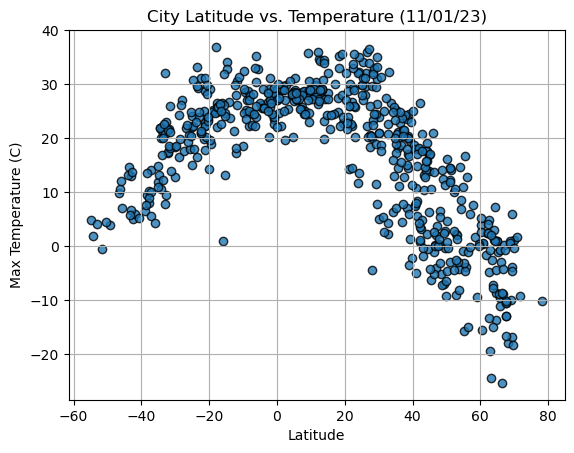

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Temperature "+ time.strftime("(%x)"))
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

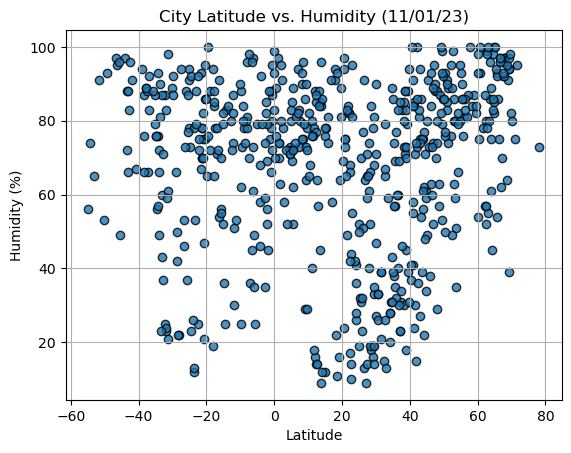

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("(%x)"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

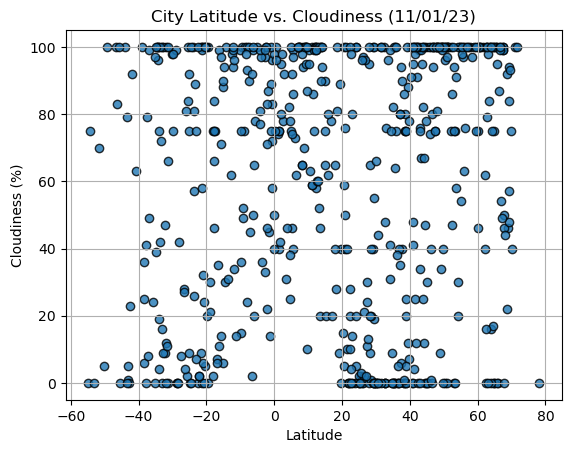

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("(%x)"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

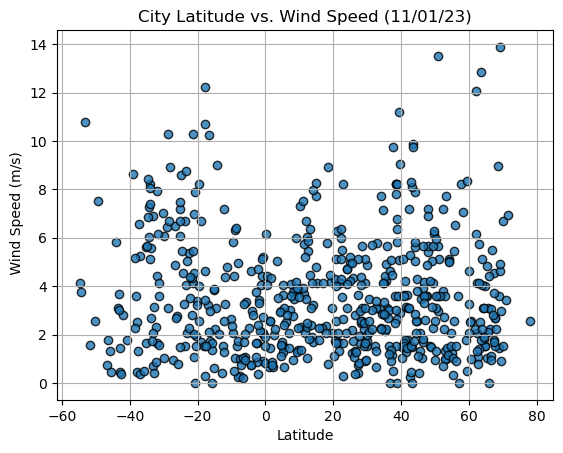

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("(%x)"))
plt.ylabel(" Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x_values, y_values,y_label, text_coordinates):
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    print(f"The r-value is: {r_value}")
    regress_values = x_values * slope + intercept
    #Line equation 
    line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#scatter plot and plot regression line/ Annotation for the line equation
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    plt.annotate(line_equation, text_coordinates, fontsize=14, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vadso,70.0744,29.7487,1.09,80,40,6.69,NO,2023-11-01 09:44:20
2,susuman,62.7833,148.1667,-19.38,99,79,1.09,RU,2023-11-01 09:44:20
3,aqaba,29.5267,35.0078,30.92,33,0,4.12,JO,2023-11-01 09:40:19
5,ribeira grande,38.5167,-28.7000,20.43,88,75,8.23,PT,2023-11-01 09:44:21
6,peniche,39.3558,-9.3811,19.50,88,88,5.10,PT,2023-11-01 09:44:22


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,blackmans bay,-43.0167,147.3167,13.07,66,1,0.45,AU,2023-11-01 09:44:20
4,port-aux-francais,-49.3500,70.2167,4.02,93,100,7.52,TF,2023-11-01 09:44:21
9,rio grande,-32.0350,-52.0986,17.19,83,100,7.95,BR,2023-11-01 09:44:22
15,hithadhoo,-0.6000,73.0833,27.24,80,96,5.21,MV,2023-11-01 09:44:24
17,daru,-9.0763,143.2092,25.33,84,52,6.32,PG,2023-11-01 09:44:25


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8384291610437179


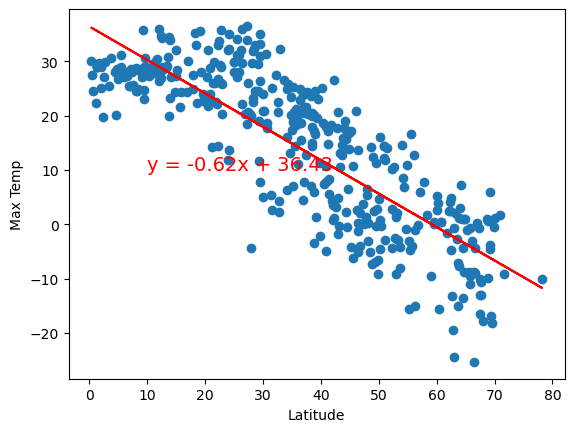

In [16]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
linear_regression_plot(x_values, y_values, y_label='Max Temp', text_coordinates=(10,10))

The r-value is: 0.7436436473212131


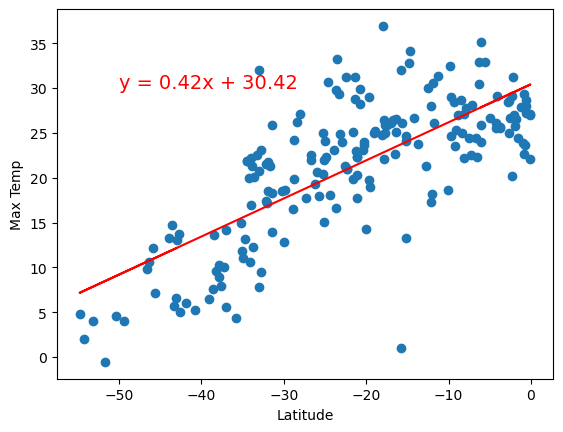

In [17]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
linear_regression_plot(x_values, y_values, y_label='Max Temp', text_coordinates=(-50,30))

**Discussion about the linear relationship:** Correlation among Max Temperature and Latitude in Northern Hemishphere is negative and the higher the Temperature, lower the latitude. 
Correlation among Max Temperature and Latitude in Sothern Hemisphere is positive, with increase in Latitude, there is increase in max temperature. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.24286760939182117


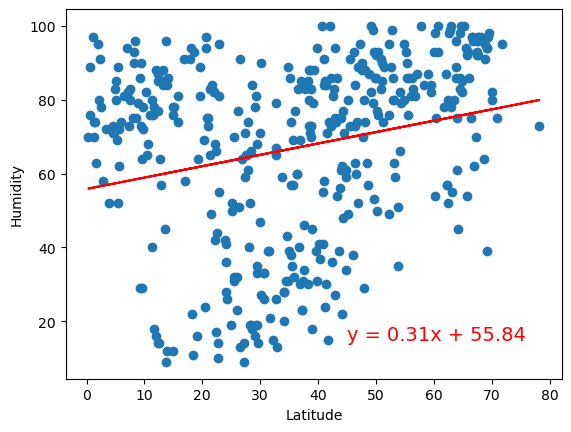

In [18]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
linear_regression_plot(x_values, y_values, y_label="Humidity", text_coordinates=(45,15))

The r-value is: -0.041198227365139006


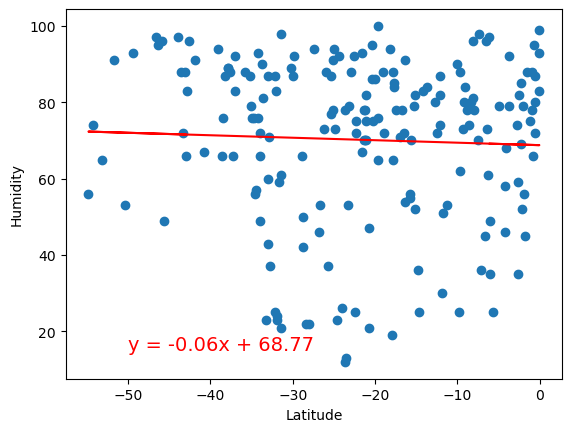

In [19]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
linear_regression_plot(x_values, y_values, y_label="Humidity", text_coordinates=(-50,15))

**Discussion about the linear relationship:** In Northern Hemisphere Latitude has a positive correlation with humidity, increase in latitude cause increase in humidity. 
Humidity in Sothern Hemisphere has a negative relation with latitude and is very low.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.04373310309016853


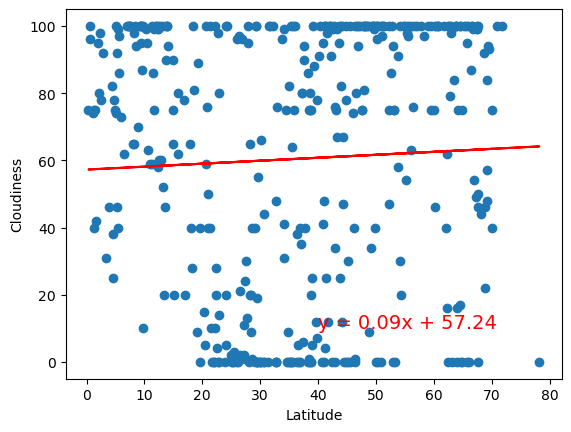

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
linear_regression_plot(x_values, y_values, y_label="Cloudiness",text_coordinates=(40,10))

The r-value is: 0.21914575753188945


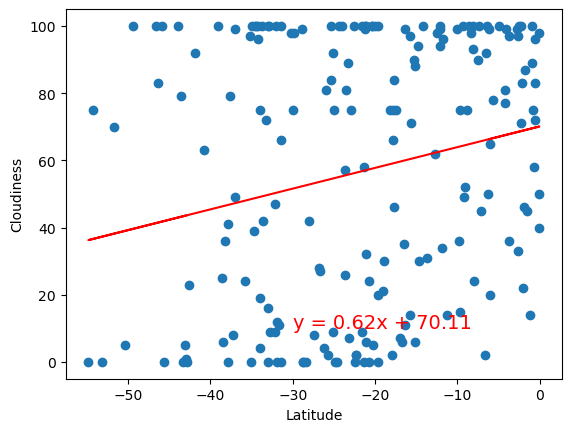

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
linear_regression_plot(x_values, y_values, y_label="Cloudiness",text_coordinates=(-30,10))

**Discussion about the linear relationship:** On both Northen and Southern Hemisphere there is a direct correlation between cloudiness and latitude. However, the degree of variation is greater in Southern and minimal in Northern hemispheres.  

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.05701213176391972


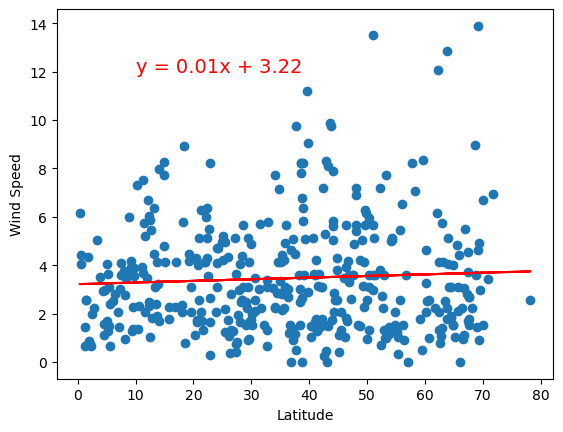

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
linear_regression_plot(x_values, y_values, y_label= "Wind Speed",text_coordinates=(10,12))

The r-value is: -0.1970613221479398


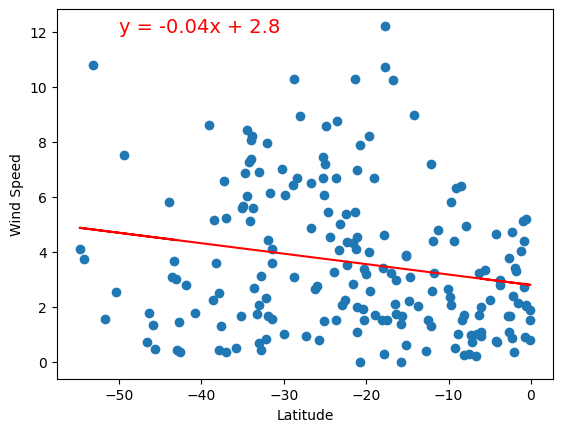

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
linear_regression_plot(x_values, y_values, y_label= "Wind Speed",text_coordinates=(-50,12))

**Discussion about the linear relationship:** There is minimal correlation among Wind Speed and latitude on Northern and greater correlation on Southern Hemisphere. In Northern Hemisphere the speed in majority of the cities is between 0 and 9. In sothern Hemisphere wind speed slowly increases and it's between 0 to 8.5.